#COMP5900 Assignment 1 (Supplementary Materials)
Use this code to answer the questions in Assignment 1

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
torch.cuda.is_available()

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
import torch.nn as nn
import torch.nn.functional as F

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 120)
        self.fc3 = nn.Linear(120, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class ConvNetSigmoid(nn.Module):
    def __init__(self):
        super(ConvNetSigmoid, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 120)
        self.fc3 = nn.Linear(120, 10)

    def forward(self, x):
        x = self.pool(torch.sigmoid(self.conv1(x)))
        x = self.pool(torch.sigmoid(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x

class ConvNet5Same(nn.Module):
    def __init__(self):
        super(ConvNet5Same, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5, padding=2)
        self.fc1 = nn.Linear(16 * 8 * 8, 120)
        self.fc2 = nn.Linear(120, 120)
        self.fc3 = nn.Linear(120, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class ConvNet3Valid(nn.Module):
    def __init__(self):
        super(ConvNet3Valid, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 6 * 6, 120)
        self.fc2 = nn.Linear(120, 120)
        self.fc3 = nn.Linear(120, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class ConvNet3Same(nn.Module):
    def __init__(self):
        super(ConvNet3Same, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 3, padding=1)
        self.fc1 = nn.Linear(16 * 8 * 8, 120)
        self.fc2 = nn.Linear(120, 120)
        self.fc3 = nn.Linear(120, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x



class SimpleNet(nn.Module):
    def __init__(self, h_count):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(3* 32 * 32, 120)
        self.hiddenLayers = nn.ModuleList()
        for _ in range(h_count):
          self.hiddenLayers.append(nn.Linear(120, 120))
        self.fcFinal = nn.Linear(120, 10)

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)
        x = F.relu(self.fc1(x))
        for fc in self.hiddenLayers:
          x = F.relu(fc(x))
        x = self.fcFinal(x)
        return x

print(ConvNet())
print(ConvNet5Same())
print(ConvNet3Valid())
print(ConvNet3Same())

ConvNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)
ConvNet5Same(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (fc1): Linear(in_features=1024, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)
ConvNet3Valid(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (

In [4]:
import torch.optim as optim
netList=[SimpleNet(i) for i in range(5)] + [ConvNet(), ConvNetSigmoid(), ConvNet5Same(), 
                                            ConvNet3Valid(), ConvNet3Same()]

CUDA=torch.cuda.is_available()
if CUDA:
  for net in netList:
    net.cuda()

# Let's first define our device as the first visible cuda device if we have
# CUDA available:  
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

#In Colab, got to Edit>Notebook settings> choose Python 3. For the hardware
#accelerator, you may select None or GPU.


cuda:0


In [5]:
# 4. Train the network
accuracy_per_model = []

for net in netList:
  print(net)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
  accuracy_values=[]
  epoch_number=[]
  for epoch in range(10):  # loop over the dataset multiple times. Here 10 means 10 epochs
      running_loss = 0.0
      for i, (inputs,labels) in enumerate(trainloader, 0):
          # get the inputs; data is a list of [inputs, labels]
          if CUDA:
            inputs = inputs.cuda()
            labels = labels.cuda()
          else:
            inputs = inputs.cpu()
            labels = labels.cpu()        
            
          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          if i % 2000 == 1999:    # print every 2000 mini-batches
              print('[epoch%d, itr%5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 2000))
              running_loss = 0.0

      correct = 0
      total = 0
      with torch.no_grad():
          for images, labels in testloader:
              if CUDA:
                images = images.cuda()
                labels = labels.cuda()
              else:
                images = images.cpu()
                labels =labels.cpu()

              outputs = net(images)
              _, predicted = torch.max(outputs.data, 1)
              total += labels.size(0)
              if CUDA:
                correct += (predicted.cpu()==labels.cpu()).sum().item()
              else:
                correct += (predicted==labels).sum().item()
          TestAccuracy = 100 * correct / total;
          epoch_number += [epoch+1]
          accuracy_values += [TestAccuracy] 
          print('Epoch=%d Test Accuracy=%.3f' %
                    (epoch + 1, TestAccuracy))
      
  print('Finished Training')
  accuracy_per_model.append(accuracy_values)

SimpleNet(
  (fc1): Linear(in_features=3072, out_features=120, bias=True)
  (hiddenLayers): ModuleList()
  (fcFinal): Linear(in_features=120, out_features=10, bias=True)
)
[epoch1, itr 2000] loss: 1.839
[epoch1, itr 4000] loss: 1.714
[epoch1, itr 6000] loss: 1.657
[epoch1, itr 8000] loss: 1.620
[epoch1, itr10000] loss: 1.611
[epoch1, itr12000] loss: 1.563
Epoch=1 Test Accuracy=46.090
[epoch2, itr 2000] loss: 1.523
[epoch2, itr 4000] loss: 1.517
[epoch2, itr 6000] loss: 1.527
[epoch2, itr 8000] loss: 1.497
[epoch2, itr10000] loss: 1.469
[epoch2, itr12000] loss: 1.488
Epoch=2 Test Accuracy=45.910
[epoch3, itr 2000] loss: 1.395
[epoch3, itr 4000] loss: 1.434
[epoch3, itr 6000] loss: 1.421
[epoch3, itr 8000] loss: 1.439
[epoch3, itr10000] loss: 1.434
[epoch3, itr12000] loss: 1.449
Epoch=3 Test Accuracy=49.010
[epoch4, itr 2000] loss: 1.348
[epoch4, itr 4000] loss: 1.374
[epoch4, itr 6000] loss: 1.389
[epoch4, itr 8000] loss: 1.362
[epoch4, itr10000] loss: 1.380
[epoch4, itr12000] loss: 1.3

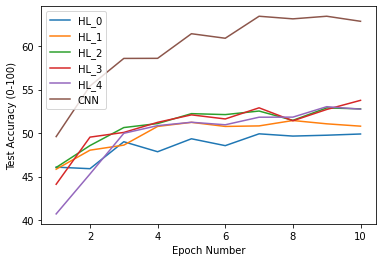

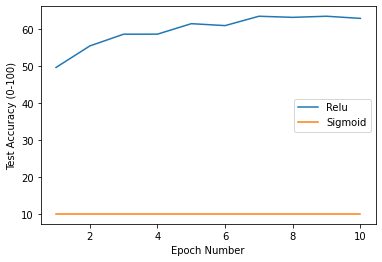

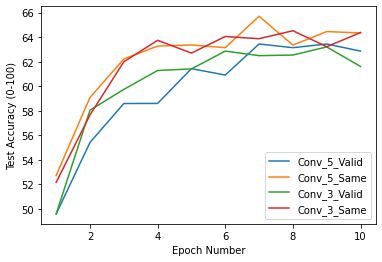

In [7]:
import matplotlib.pyplot as plt
import numpy as np

'''
############## Question 1 ##############
'''
# Plot the data
plt.plot(epoch_number, accuracy_per_model[0], label='HL_0')
plt.plot(epoch_number, accuracy_per_model[1], label='HL_1')
plt.plot(epoch_number, accuracy_per_model[2], label='HL_2')
plt.plot(epoch_number, accuracy_per_model[3], label='HL_3')
plt.plot(epoch_number, accuracy_per_model[4], label='HL_4')
plt.plot(epoch_number, accuracy_per_model[5], label='CNN')

# Add a legend
plt.legend()

# Add labels
plt.xlabel("Epoch Number")
plt.ylabel("Test Accuracy (0-100)")

# Show the plot
plt.show()


'''
############## Question 2 ##############
'''
# Plot data for question 2
plt.plot(epoch_number, accuracy_per_model[5], label='Relu')
plt.plot(epoch_number, accuracy_per_model[6], label='Sigmoid')

# Add a legend
plt.legend()

# Add labels
plt.xlabel("Epoch Number")
plt.ylabel("Test Accuracy (0-100)")

# Show the plot
plt.show()

'''
############## Question 3 ##############
'''
# Plot the data
plt.plot(epoch_number, accuracy_per_model[5], label='Conv_5_Valid')
plt.plot(epoch_number, accuracy_per_model[7], label='Conv_5_Same')
plt.plot(epoch_number, accuracy_per_model[8], label='Conv_3_Valid')
plt.plot(epoch_number, accuracy_per_model[9], label='Conv_3_Same')

# Add a legend
plt.legend()

# Add labels
plt.xlabel("Epoch Number")
plt.ylabel("Test Accuracy (0-100)")

# Show the plot
plt.show()

## Anything better than 10% accuracy (randomly picking a class out of 10 classes)
# means the network has learned something.

#Additional code to explore the dataset and the trained model

In [ ]:
# Show some random training images

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.size())
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
# Test the network on some test images

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# The outputs are energies for the 10 classes.
# The higher the energy for a class, the more the network
# thinks that the image is of the particular class.
# So, let's get the index of the highest energy:
if CUDA:
  images = images.cuda()
  labels = labels.cuda()
else:
  images = images.cpu()
  labels =labels.cpu()
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))


In [ ]:
# Lets check what are the classes that performed well, and the classes that did
# not perform well:

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for images, labels in testloader:
        if CUDA:
          images =images.cuda()
          labels =labels.cuda()
        else:
          images =images.cpu()
          labels =labels.cpu()     
      
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))